# Part I - Ford GoBike System Data
## by Jeongho Kim

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [304]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [305]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(df.shape)
print(df.info())
df

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### What is the structure of your dataset?

The rental start time and return time are recorded, and 'duration_sec' is calculated. There is information about 'start station' and 'end station' respectively. It also includes the bicycle ID and information about the user who used it. There is information on whether each user uses a service called 'bike share for all'.

### What is/are the main feature(s) of interest in your dataset?

* When are most trips taken in terms of time of day, day of the week, or month of the year?

* How long does the average trip take?

* Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

It is expected that the aspect of usage time and travel distance will change depending on when the bicycle is used, the user's gender, service subscription, and 'bike_share_for_all_trip'.

In [306]:
# Extract day of the week and time information
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

df['weekday'] = df.start_time.dt.day_name()
df['hour'] = df.start_time.dt.hour

In [307]:
# Calculate the age of users
df['age'] = 2019 - df['member_birth_year']

In [308]:
# If the start station and the end station are the same, it is classified as a circular trip.
df['circular'] = np.where(df.start_station_id==df.end_station_id, True, False)

In [309]:
# Categorize the day of the week
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
wdcategory = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
df['weekday'] = df['weekday'].astype(wdcategory)

## Univariate Exploration

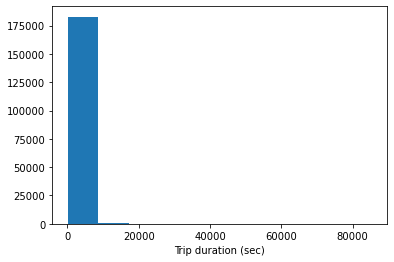

In [310]:
# Find out the distribution of duration time
plt.hist(data=df, x='duration_sec')
plt.xlabel('Trip duration (sec)');

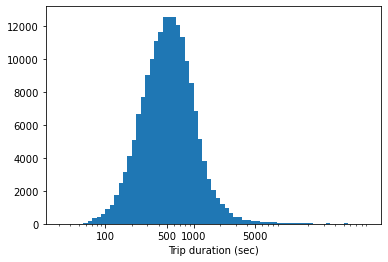

In [311]:
binsize = 0.05
bins = 10 ** np.arange(1.5, np.log10(df.duration_sec.max())+binsize, binsize)

plt.hist(data=df, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([100,500,1000,5000],[100,500,1000,5000])
plt.xlabel('Trip duration (sec)');

In [312]:
np.log10(df.duration_sec.describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

The log value of duration_sec is similar to the normal distribution. The largest number of users is distributed around 500 seconds.

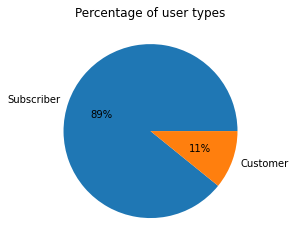

In [313]:
# Find out the percentage of user types
type_counts = df.user_type.value_counts()
plt.title('Percentage of user types')
plt.pie(type_counts, labels = type_counts.index, autopct='%1.0f%%');

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64


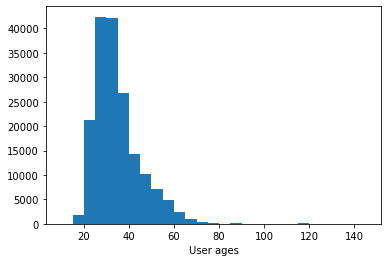

In [314]:
# Find out the distribution of users' ages
print(df.age.describe())
bins = np.arange(10, 150, 5)
plt.xlabel('User ages')
plt.hist(df.age, bins=bins);

count    5.243403
mean     1.533944
std      1.005038
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.149219
Name: age, dtype: float64


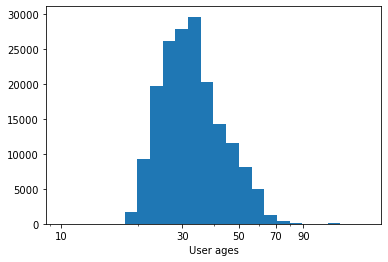

In [315]:
print(np.log10(df.age.describe()))
bins = 10 ** np.arange(1, 2.2, 0.05)
plt.hist(df.age, bins=bins)
plt.xscale('log')
plt.xlabel('User ages')
plt.xticks([10,30,50,70,90],[10,30,50,70,90]);

Most users are distributed around the age of 30.

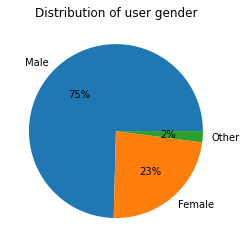

In [316]:
# Distribution of user gender
gender_counts = df.member_gender.value_counts()
plt.title('Distribution of user gender')
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.0f%%');

There are about 3.3 times more male users than female users.

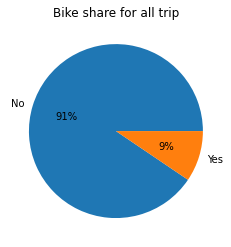

In [317]:
# Find out the ratio of 'bike share for all trip'
share_counts = df.bike_share_for_all_trip.value_counts()
plt.title('Bike share for all trip')
plt.pie(share_counts, labels = share_counts.index, autopct='%1.0f%%');

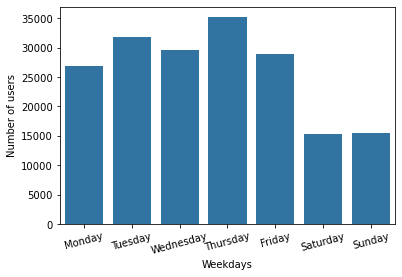

In [318]:
# Number of users per day
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='weekday', color=base_color)
plt.xticks(rotation=15)
plt.xlabel('Weekdays')
plt.ylabel('Number of users');

The number of bicycles used on weekends is lower than on weekdays.

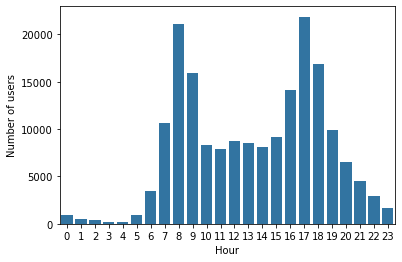

In [319]:
# Check the number of users per hour
sb.countplot(data=df, x='hour', color=base_color)
plt.xlabel('Hour')
plt.ylabel('Number of users');

The number of users is low during the early morning hours, and the number of users is highest around 8 and 17:00. Combined with the fact that there are a lot of users on weekdays, it can be inferred that bicycles are mainly used for commuting.

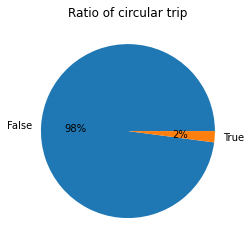

In [320]:
# Find out the ratio of circular trip.
cir_counts = df.circular.value_counts()
plt.title('Ratio of circular trip')
plt.pie(cir_counts, labels = cir_counts.index, autopct='%1.0f%%');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

It was confirmed that the number of users flocked at a specific time and day of the week, and from this, it was possible to infer that bicycles are widely used for commuting. In addition, it was found that there was an imbalance in the user's gender.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of trip duration and user age was right skewed, so the x-axis was changed to log scale.

## Bivariate Exploration

In [321]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,hour,age,circular
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,35.0,False
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18,NaN,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,47.0,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,30.0,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,45.0,False


In [322]:
numeric_vars = ['duration_sec', 'age']
categoric_vars = ['user_type','member_gender','weekday','hour']
bool_vars = ['bike_share_for_all_trip','circular']

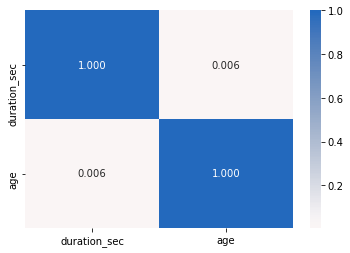

In [323]:
# correlation plot
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

The correlation between age and duration_sec is close to zero.

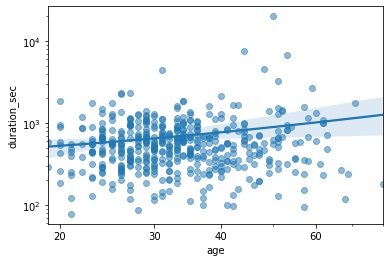

In [324]:
# plot matrix: sample 500 diamonds
np.random.seed(42)
samples = np.random.choice(df.shape[0], 500, replace=False)
df_samp = df.loc[samples,:]

sb.regplot(data=df_samp, x='age', y='duration_sec', scatter_kws={'alpha':0.5})
plt.xscale('log')
plt.yscale('log')
plt.xticks([20,30,40,60],[20,30,40,60]);

It is difficult to see that there is a correlation between age and duration_sec.

/Users/jeongho/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 2880x720 with 0 Axes>

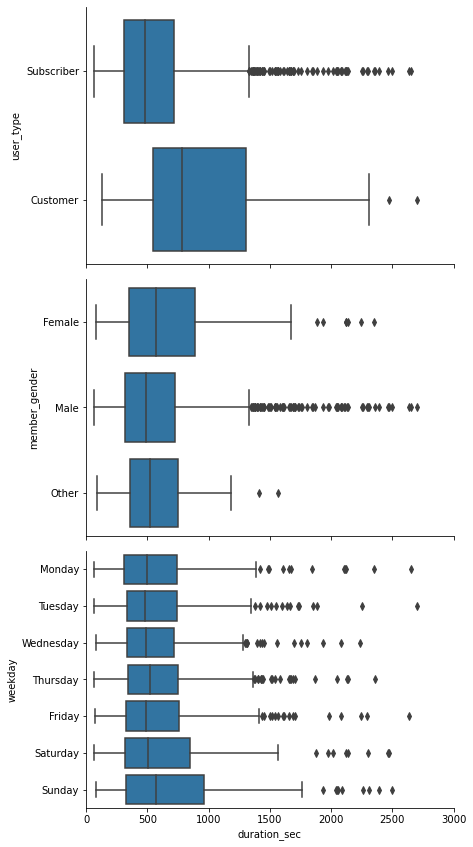

In [325]:
# plot matrix of duration_sec against categorical features
np.random.seed(42)
samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

plt.figure(figsize=[40,10])
g = sb.PairGrid(data=df_samp, x_vars = ['duration_sec'], y_vars = ['user_type', 'member_gender', 'weekday'], size=4, aspect=1.5)
g.map(sb.boxplot, color=base_color)
g.set(xlim=(0,3000))

Customers tend to spend longer than subscribers. It is also observed that women use it slightly longer than men. On weekends, the duration variation is large and the proportion of users who use it for a long time has increased.

<AxesSubplot:xlabel='hour', ylabel='duration_sec'>

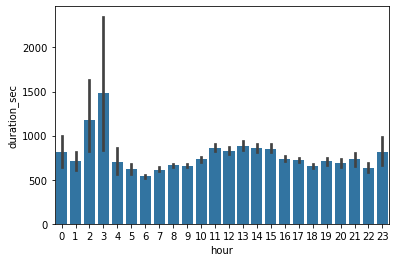

In [326]:
# Find out the relationship between usage time and duration.
sb.barplot(data = df, x='hour', y='duration_sec', color=base_color)

Users who start using the bike in the early morning tend to use the bike for a longer time.

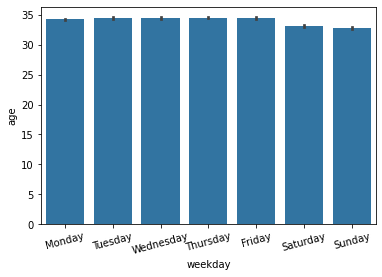

In [327]:
# Find out the age of the user by day of the week.
sb.barplot(data = df, x='weekday', y='age', color=base_color)
plt.xticks(rotation=15);

It can be seen that the age of users decreases slightly over the weekend.

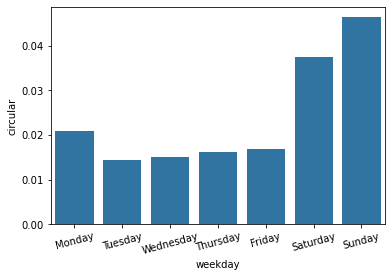

In [328]:
# Find out the difference in the ratio of circular trips by day of the week.
df_weekday_circular = df.groupby('weekday')['circular'].mean()
sb.barplot(x=df_weekday_circular.index, y=df_weekday_circular, color=base_color)
plt.xticks(rotation=15);

It can be seen that the percentage of circular trips returning back to the departure station is significantly high on weekends.

<AxesSubplot:xlabel='weekday', ylabel='hour'>

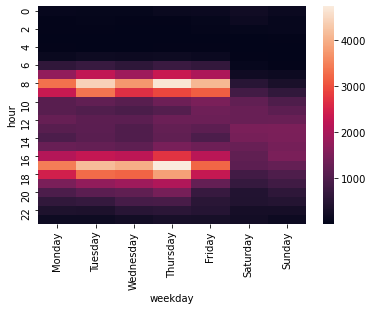

In [329]:
# Find out the distribution of users by day and hour.
w_h_counts = df.groupby(['weekday','hour']).size().reset_index(name='count').pivot(index='hour', columns='weekday', values='count')
sb.heatmap(w_h_counts)

It can be seen that users are concentrated in a specific time period on weekdays, not on weekends. It's right around 8 and 17 o'clock. You will notice that there are more users especially on Thursday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was confirmed that users were concentrated during specific times of the week (near 8 o'clock and 17:00). It was found that subscribers use their bikes for a shorter amount of time than customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In addition, they found that women spend a little more time on bicycles than men. And there were a lot of cases where they used the bike for a long time on the weekend. And customers who started using it around 2 or 3 in the morning used the bike for a longer period of time. Interestingly, the percentage of circular trips returning to the starting point on weekends increased.

## Multivariate Exploration

Text(0.5, 1.0, 'Subscriber')

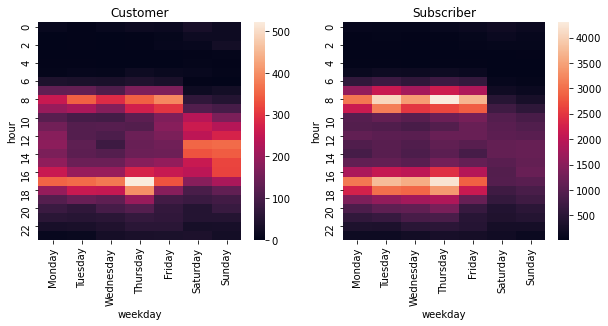

In [330]:
# Find out the number of users per day and hour by subscription
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
w_h_counts = df[df.user_type=='Customer'].groupby(['weekday','hour']).size().reset_index(name='count').pivot(index='hour', columns='weekday', values='count')
sb.heatmap(w_h_counts)
plt.title('Customer')

plt.subplot(1,2,2)
w_h_counts = df[df.user_type=='Subscriber'].groupby(['weekday','hour']).size().reset_index(name='count').pivot(index='hour', columns='weekday', values='count')
sb.heatmap(w_h_counts)
plt.title('Subscriber')

In the case of subscribers, as seen earlier, it can be seen that users are crowded at specific times on weekdays. On the other hand, in the case of non-subscribers, this tendency is relatively weak, and it can be seen that there are many weekend users.

Text(0.5, 1.0, 'Subscriber')

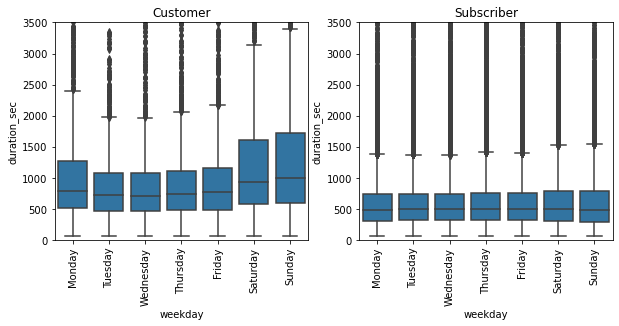

In [331]:
# Find out the duration of each day of the week depending on whether you have a subscription.
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
sb.boxplot(data=df[df.user_type=='Customer'], x='weekday', y='duration_sec', color=base_color)
plt.ylim(0,3500)
plt.xticks(rotation=90)
plt.title('Customer')

plt.subplot(1,2,2)
sb.boxplot(data=df[df.user_type=='Subscriber'], x='weekday', y='duration_sec', color=base_color)
plt.ylim(0,3500)
plt.xticks(rotation=90)
plt.title('Subscriber')

For subscribers, it shows a uniform duration regardless of the day of the week. However, in the case of non-subscribers, we can see a tendency to use it for a longer time on weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the case of non-subscribers, it can be seen that both the number and duration of use on weekends increase. On the other hand, in the case of subscribers, the duration for each day of the week is constant, and it can be seen that the frequency of use is concentrated during weekday commuting hours.

### Were there any interesting or surprising interactions between features?

It was confirmed that the bicycle usage patterns of non-subscribers and subscribers were significantly different. In the case of subscribers, they mainly used bicycles for more regular purposes, such as commuting to and from work.

## Conclusions

First, it was found that bicycles are mainly used on weekdays and during the daytime. Considering that the hours are around 8 am and 17:00 in the evening, it can be inferred that they are used for commuting. Overall, subscribers tended to ride their bikes for a shorter amount of time than non-subscribers. Users also cycled longer on weekends than on weekdays and made more trips back to their starting point on weekends. When multiple variables were taken into account, non-subscribers used their bikes more and longer on weekends than subscribers. Subscribers can use their bicycles for regular use, such as going to work on weekdays.


In [332]:
df.to_csv('201902-fordgobike-tripdata_wrangled.csv')